1. 数据加载与基本检查
--------------------------------------------------
原始数据形状: (21707, 13)

数据列名: ['year', 'contestant', 'country', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'total', 'individual_rank', 'award']

数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21707 entries, 0 to 21706
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             21707 non-null  int64  
 1   contestant       21707 non-null  object 
 2   country          21707 non-null  object 
 3   p1               20614 non-null  float64
 4   p2               20614 non-null  float64
 5   p3               20614 non-null  float64
 6   p4               20614 non-null  float64
 7   p5               20614 non-null  float64
 8   p6               20614 non-null  float64
 9   p7               27 non-null     float64
 10  total            21707 non-null  int64  
 11  individual_rank  21678 non-null  float64
 12  award            14663 non-nu

findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
C:\Users\水草姐\AppData\Local\Temp\ipykernel_8260\4266238189.py:90: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\水草姐\AppData\Local\Temp\ipykernel_8260\4266238189.py:90: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not fou

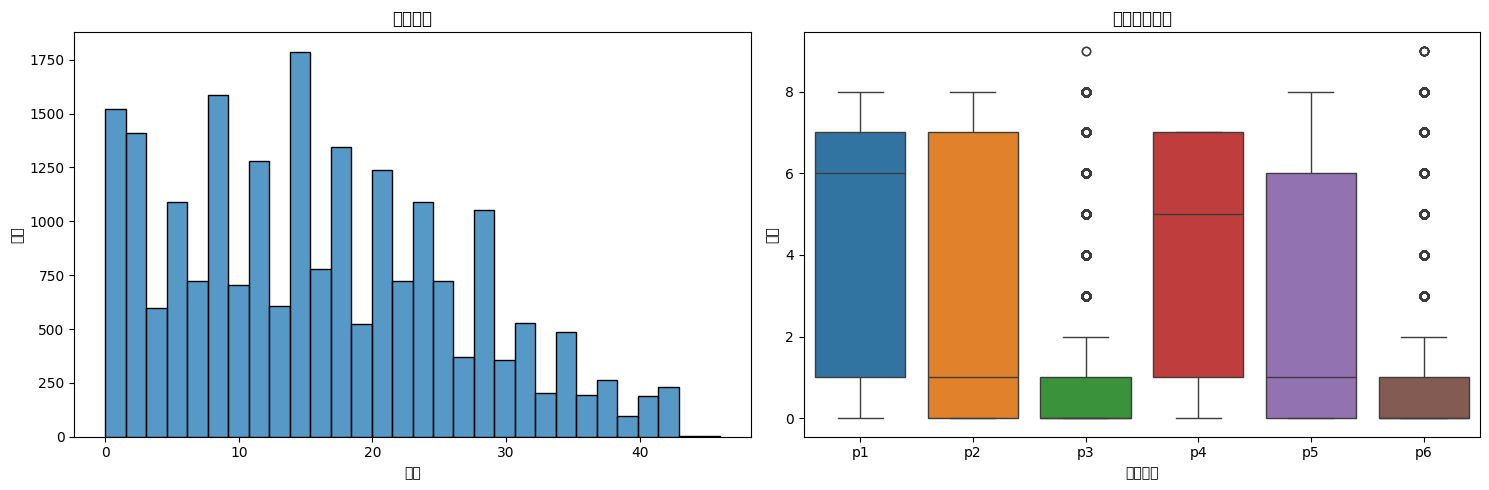


5. 数据质量报告
--------------------------------------------------

数据质量统计:
总记录数: 21707
特征数量: 21
缺失值数量: 35311
重复记录数: 48
异常值总数: 6307
总分不匹配数: 1100

处理后的数据已保存为 processed_imo_data.csv


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False

# 1. 数据加载与基本检查
print("1. 数据加载与基本检查")
print("-" * 50)

# 读取数据
df = pd.read_csv('individual_results_df.csv')
print('原始数据形状:', df.shape)
print('\n数据列名:', df.columns.tolist())
print('\n数据基本信息:')
print(df.info())

# 2. 数据清洗
print("\n2. 数据清洗")
print("-" * 50)

# 检查缺失值
print('\n缺失值统计:')
missing_stats = df.isnull().sum()
print(missing_stats[missing_stats > 0])

# 检查重复值
duplicates = df.duplicated().sum()
print(f'\n重复记录数: {duplicates}')

# 检查异常值
def check_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

numeric_cols = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'total']
outliers = check_outliers(df, numeric_cols)
print('\n异常值统计:')
print(pd.Series(outliers))

# 数据验证
print('\n数据验证:')
# 验证总分是否等于各题得分之和
df['calculated_total'] = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].sum(axis=1)
total_mismatch = (df['total'] != df['calculated_total']).sum()
print(f'总分不匹配的记录数: {total_mismatch}')

# 3. 特征工程
print("\n3. 特征工程")
print("-" * 50)

# 创建新的特征
df['total_normalized'] = df['total'] / 42  # 总分标准化（满分42分）
df['year_decade'] = (df['year'] // 10) * 10  # 创建十年区间
df['problem_completion'] = df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].apply(lambda x: (x > 0).sum(), axis=1)  # 完成题目数量
df['first_day_score'] = df[['p1', 'p2', 'p3']].sum(axis=1)  # 第一天得分
df['second_day_score'] = df[['p4', 'p5', 'p6']].sum(axis=1)  # 第二天得分
df['score_difference'] = df['first_day_score'] - df['second_day_score']  # 两天分数差异
df['avg_score_per_problem'] = df['total'] / df['problem_completion']  # 平均每题得分

# 4. 数据分布可视化
print("\n4. 数据分布可视化")
print("-" * 50)

# 绘制得分分布图
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total', bins=30)
plt.title('总分分布')
plt.xlabel('总分')
plt.ylabel('频数')

plt.subplot(1, 2, 2)
sns.boxplot(data=df[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']])
plt.title('各题得分分布')
plt.xlabel('题目编号')
plt.ylabel('得分')

plt.tight_layout()
plt.show()

# 5. 数据质量报告
print("\n5. 数据质量报告")
print("-" * 50)

quality_report = {
    '总记录数': len(df),
    '特征数量': len(df.columns),
    '缺失值数量': missing_stats.sum(),
    '重复记录数': duplicates,
    '异常值总数': sum(outliers.values()),
    '总分不匹配数': total_mismatch
}

print('\n数据质量统计:')
for metric, value in quality_report.items():
    print(f'{metric}: {value}')

# 保存处理后的数据
df.to_csv('processed_imo_data.csv', index=False)
print('\n处理后的数据已保存为 processed_imo_data.csv')


In [18]:
# 验证数据完整性
print('缺失值统计:')
print(df.isnull().sum())

print('\n奖项类型统计:')
print(df['award'].value_counts())

print('\n年份范围:', df['year'].min(), '-', df['year'].max())

print('\n参与国家数量:', df['country'].nunique())


缺失值统计:
year                         0
contestant                   0
country                      0
p1                        1093
p2                        1093
p3                        1093
p4                        1093
p5                        1093
p6                        1093
p7                       21680
total                        0
individual_rank             29
award                     7044
calculated_total             0
total_normalized             0
year_decade                  0
problem_completion           0
first_day_score              0
second_day_score             0
score_difference             0
avg_score_per_problem      755
dtype: int64

奖项类型统计:
award
Bronze medal                       5345
Honourable mention                 3878
Silver medal                       3623
Gold medal                         1765
Gold medal, Special prize            23
Silver medal, Special prize          10
Bronze medal, Special prize           8
Special prize                     

findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
findfont: Font family 'Source Han Sans CN' not found.
c:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 33719 (\N{CJK UNIFIED IDEOGRAPH-83B7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22870 (\N{CJK UNIFIED IDEOGRAPH-5956}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_

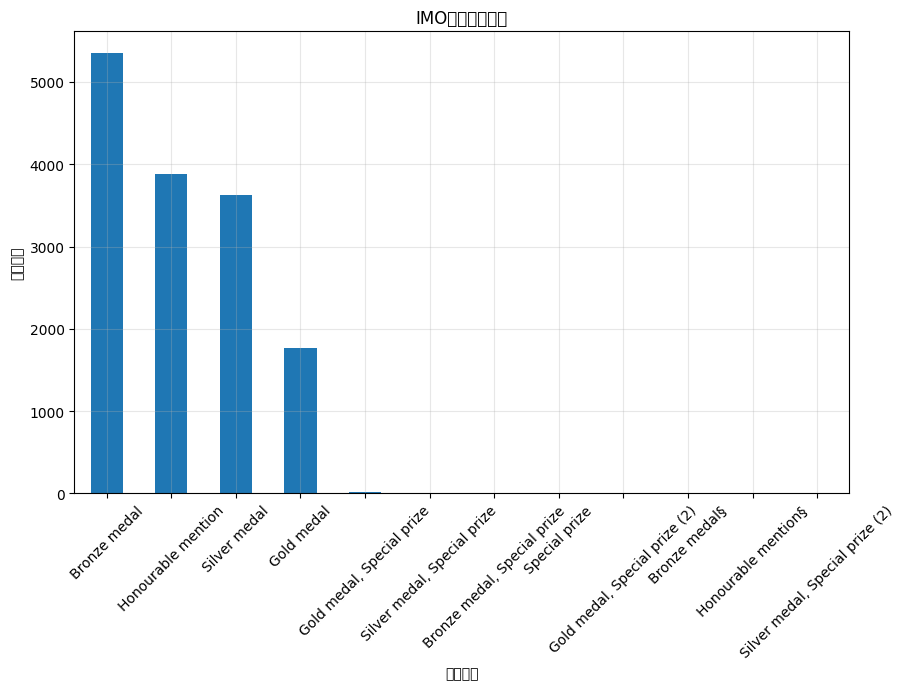

In [19]:
# 测试中文显示
plt.figure(figsize=(10, 6))
df['award'].value_counts().plot(kind='bar')
plt.title('IMO获奖情况统计')
plt.xlabel('奖项类型')
plt.ylabel('获奖人数')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()
